# Brief overview of CMB maps and spectra

In this tutorial, we will learn some basics of CMB maps and spectra handling. As usual, you can run the tutorial on google drive -- just open it with google colab.

In [ ]:
#If you are running with google colab, authenticate yourself by running this cell
# Follow the instructions: click on the link, authenticate with your gmail account,
# copy the link and paste it below
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'


In [1]:
# Now, let's load some useful modules:
# numpy for maths
# matplotlib.pyplot for making nice figures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Un-comment the command below and run this cell of you are on google colab
# This will install another useful module in your drive
# healpy is the module used for maps and spectra handling

#!pip install healpy

In [3]:
import healpy as hp

In [8]:
#!wget https://lambda.gsfc.nasa.gov/tmp/camb/camb_05647368_lensedtotcls.dat

# Let's read a CMB map

We will load the CMB maps reconstructed by the Planck satellite. These maps are saved in the file 'Planck_file'. We will read them using the function 'read_map' from healpy. The function takes a file with maps in input and returns an array (or a series of arrays) with the maps.

In [32]:
Planck_file='COM_CMB_IQU-commander_2048_R3.00_full.fits'
Planck,h=hp.read_map(Planck_file,[0,1,2],h=True)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING


In [33]:
h

[('XTENSION', 'BINTABLE'),
 ('BITPIX', 8),
 ('NAXIS', 2),
 ('NAXIS1', 32),
 ('NAXIS2', 50331648),
 ('PCOUNT', 0),
 ('GCOUNT', 1),
 ('TFIELDS', 8),
 ('COMMENT', ' -------------------------------------------------------------'),
 ('COMMENT', ' Products from COMMANDER component separation method'),
 ('COMMENT', ' -------------------------------------------------------------'),
 ('COMMENT',
  ' Further details in the Planck Legacy Archive and Explanatory Supplement'),
 ('COMMENT', ' http://www.cosmos.esa.int/web/planck/pla/'),
 ('COMMENT', ' -------------------------------------------------------------'),
 ('COMMENT', ''),
 ('COMMENT', ' *** Planck params ***'),
 ('COMMENT', ''),
 ('EXT-NAME', 'COMP-MAP'),
 ('AST-COMP', 'CMB'),
 ('PIXTYPE', 'HEALPIX'),
 ('COORDSYS', 'GALACTIC'),
 ('POLCCONV', 'COSMO'),
 ('ORDERING', 'NESTED'),
 ('NSIDE', 2048),
 ('METHOD', 'COMMANDER'),
 ('BAD_DATA', -1.6375e+30),
 ('DATE', '2018-04-10'),
 ('COMMENT', ''),
 ('TTYPE1', 'I_STOKES'),
 ('TFORM1', '1E'),
 ('TUN

Planck is an array of 3 maps. We will see in a moment what they are. Now, we can visualize the maps. We use the 'mollview' function of healpy.

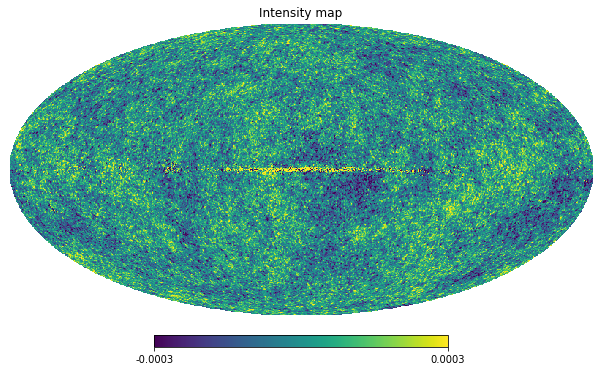

In [60]:
hp.mollview(Planck[0],min=-0.0003,max=0.0003,title='Intensity map')
# mollview takes a map in input. 
# More options can be used to specify, e.g.,  the color range to be plotted (min,max)
# and a title.

The map above is the intensity (or 'temperature') map as measured by Planck. What you see there is CMB instensity as measured at a given position in the sky. You can easily see that the color changes in the map in a way that the sky seems 'spotty'. These spots correspond to the CMB fluctuations over the average CMB temperature of 2.7K. In particular, yellow spots correspond to hotter regions, while green spots are colder.

Another thing that we can appreciate by eye is that there seems to be no clear pattern in those spots. In a slightly more technical way, we say that the CMB fluctuations are random gaussian.

The color range goes from -300 uK to 300 uK: the signal contained in CMB fluctuations is much smaller than the average CMB signal (compare with 2.7 K!).

Now, let's see what other maps are contained in the 'Planck array'.

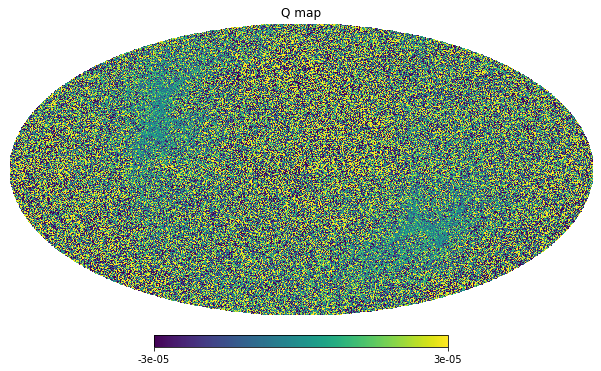

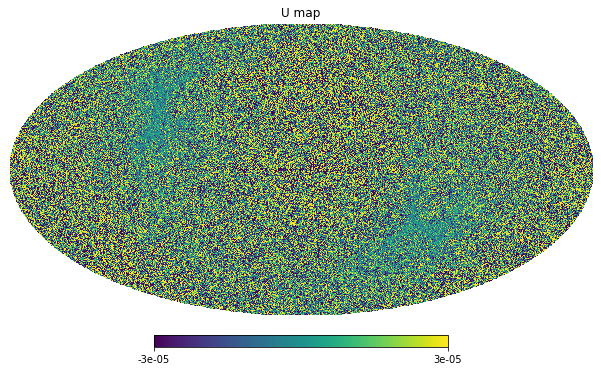

In [59]:
hp.mollview(Planck[1],min=-3e-5,max=3e-5,title='Q map'),
hp.mollview(Planck[2],min=-3e-5,max=3e-5,title='U map')

The figures above are the CMB polarization maps. We know that the CMB is partly polarized because, at some point during the cosmic evolution, CMB photons scatter off free electrons and get linearly polarized. To describe the CMB polarization, we make use of formalism from optics. We choose to represent the CMB signal in terms of Stokes parameters: T is the intensity signal, Q and U are the terms that describe linear polarization.

Note the colorbar. CMB polarization fluctuations are much smaller than temperature fluctuations!

# From maps to spectra

Sometimes it is useful to 'compress' the information contained in CMB maps. One way to make this compression is to compute the two-point correlation function. Roughly speaking, this means that we average over the product of signals coming from all points in the sky separated by a given angle. We then repeat this operation for several angle separations. It is more common to talk about the power spectrum instead of the two-point correlation function. The CMB power spectrum is the wiggly function with peaks and throughs that you might have seen often in talks and seminars. Let's see if we can easily understand where it comes from.

The CMB signal is composed by photons that, long time ago, last scattered off matter and started to freely propagate in the Universe. You might have heard that CMB maps are a snapshot of the last-scattering surface (more or less, you will learn more during the course). A such, we can think of the CMB signal as living on the surface of a sphere. We can represent this sphere in 'real space' coordinates, for example dividing the sphere in small patches (pixels) and attaching a number (the CMB instensity, the CMB Q polarization, etc) to each pixel. We can also go for another representation that is much more useful for certain mathematical operations we need to do on CMB data. This other representation is called 'harmonic' representation. It works in this way: instead of dividing the sphere in pixels, we divide it by using special functions called 'spherical harmonics'. These functions are characterized by 2 numbers: ell, which tells you about the angular separation between point on the sphere; emm, which tells you in how many independent ways you can separate two points by the angular separation given by ell.

For example, ell=0 corresponds to the full sphere. Since you only have one sphere, there is only one value of emm that corresponds to ell=0, and it is emm=0. Going forward, ell=1 corresponds to a 180deg angular separation. We have 3 independent ways in which you can dispose points separated by 180deg: along x, along y, along z. So, we have 3 emms corresponding to ell=1, which are emm=-1,0,1. The rule is that, for a given ell, there are 2ell+1 values of emm. 

Using this harmonic representation, the CMB fields (temperature and polarizations) can be decomposed in spherical harmonics. In practice, the CMB signal as measured in a given position on the sky can be written as the sum of infinite spherical harmonic functions, each with its own coefficient. For example, we can write:

T_i = Sum_l Sum_m a_lm Y_lm

where we have defined ell=l and emm=m for convenience. Y_lm is the harmonic function of a given l,m pair. a_lm is the (complex) coefficient of that function. l is summed from 0 to infinity. For each l, m is summed from -l to l. For each l, if we make a histogram of the a_lm, we see that they are gaussian distributed. If we subtract the average CMB temperature from the map, the gaussian distribution is centered in 0, because we are just left with fluctuations over a zero background. The variance of the distribution (which is a measure of the width) is given by

< a_lm a^l'm' > = d_ll' d_mm' C_l

Let's take a moment to understand this formula. The < > symbols indicate that we are taking the average of the expression within brackets. This is a very special average. It is called ensemble average. It means that we should be averaging over all possible realizations of our Universe. The idea here is that, starting from the same initial conditions, we could have had infinite ways in which our Universe could have evolved. However, we can only see the one realization where we happen to live...we will see in a moment what effects arise from this limitation. Let's go back to the formula above. The d_ll' d_mm' are Dirac deltas. They mean that the average is non-zero only when l=l' and m=m'. This comes from the fact that a_lm are independent variables, so there is no correlation between different l's and m's. Finally, C_l is the variance of the gaussian distribution of a_lm. Note that it only depends on l, and not on m. This comes from the fact that the CMB fiels is isotropic: the only thing that matters is the magnitude of the angular separation between points, while the direction along which the points are separated is not relevant. We can thus write:

C_l = Sum_m <|a_lm|^2>/(2l+1)

The C_l is the CMB power spectrum, also known as the harmonic equivalent of the two point correlation function. It tells you how much power in fluctuations you can find if you look at the ell'th harmonic component of the CMB. This is analogous to say how much correlated two points separated by a certain angle are.

# Some issues with the picture above


In practice, we cannot really sum over infinite harmonic functions to get the CMB fields. We have to cut the sum at a given ell_max, that usually depends on the properties of our CMB instrument.

Another problem is that we cannot really average over different realization of the Universe, because we can observe the only Universe we live in. This second problem is solved in the following way. If we take regions in the sky that are separated much more than their size, we can assume that those regions are independent from each other. In other words, we can assume that those regions are independent realizations of the same process that leads to the evolution of our Universe. This assumption is called ergodic hypothesys and is extremely important in statistical physics. It allows to replace our ensamble average over different Universes with the average over different sky patches of the same Universe. The equation for the power spectrum C_l becomes

Ch_l = Sum_m |a_lm|^2/(2l+1)

Note that the < > are missing, and that we are calling the 'new' power spectrum Ch_l and not C_l. This is to distinguish between the 'true' power spectrum (i.e., the one we would measure if we had access to several realizations of the Universe) and the 'estimated' power spectrum (i.e., the one we can compute thanks to the ergodic hypothesys).

This operation introduces an intrinsic source of uncertainty. Roughly speaking, the number of a_lm we can average over to compute Ch_l is limited (only 2l+1 a_lm per given l) with respect to the infinite pool of a_lm that enter the definition of C_l. This limitation is a reflection of our limitation as observers of one Universe, and it is called 'cosmic variance'. We will never make measurements of the CMB spectrum that are more precise than the cosmic variance limit. Since cosmic variance depends on the number of a_lm to average over, it is clear that cosmic variance is a muhch more severe limitation at low multipoles l (or, at large angular separations or 'scales') than at high multipoles (or smaller angular scales).

# Some applications

In what follows, we will apply some of the concepts described above. In particular, we will use some healpy functions to generate spectra from maps and viceversa. We will also see the cosmic variance at play. Finally, we will see how the instrumental properties of our experiments enter the game.

In the 'camb_files' folder, we have a list of files that contain various CMB spectra. We will use the 'totcls' file. You are welcome to see what happens if you use any of the other files. Can you explain your results?

In [10]:
!ls /content/drive/My Drive/s-nsbp/camb_files/

camb_05647368.log              camb_05647368_scalcls.dat
camb_05647368_lensedcls.dat    camb_05647368_tenscls.dat
camb_05647368_lensedtotcls.dat camb_05647368_totcls.dat


In [11]:
fname='/content/drive/My Drive/s-nsbp/camb_files/camb_05647368_totcls.dat'
l,TT,EE,BB,TE = np.loadtxt(fname,unpack=True,usecols=(0,1,2,3,4))

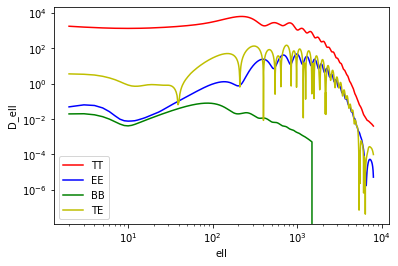

In [12]:
plt.plot(l,TT,'-r',label='TT')
plt.plot(l,EE,'-b',label='EE')
plt.plot(l,BB,'-g',label='BB')
plt.plot(l,np.abs(TE),'-y',label='TE')
plt.xlabel('ell')
plt.ylabel('D_ell')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In order to generate maps from these spectra, we need to do the following:

1) we need to add two fields at the beginnin of each spectrum. They correspond to the CMB monopole (ell=0) and dipole (ell=1). We put them manually to zero, because we assume that we have removed them.

2) we need to remove the normalization factor l(l+1)/2pi

In [24]:
norm=l*(l+1)/2./np.pi
cl=np.zeros((len(TT)+2,4))
cl[2:,0]=TT/norm
cl[2:,1]=EE/norm
cl[2:,2]=BB/norm
cl[2:,3]=TE/norm

The 'synfast' function generates maps from a set of CMB spectra. We can easily understand this operation. We have seen above that the Cl's are the variance of the gaussian distribution of a_lm's centered in zero. If you are given the peak and the variance of a gaussian distribution, you can draw any number of variables from that distribution. The synfast function is doing something similar: given the variance C_l (and the peak given by the monopole ell=0), synfast is drawing a set of variables that follow that gaussian distribution. From these variables (the a_lm), synfast can provide the CMB map.

In [25]:
fwhm=0.#np.pi/180./60.
map=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


Let's have a look at these new maps!

# First task

Visualize the maps generated with synfast. Attach a title to each map.

In [ ]:
# Your code here
# ...

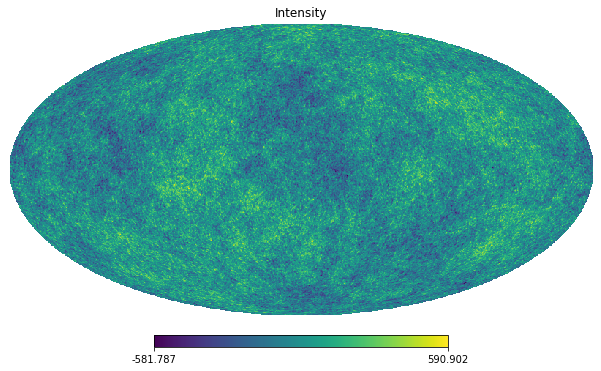

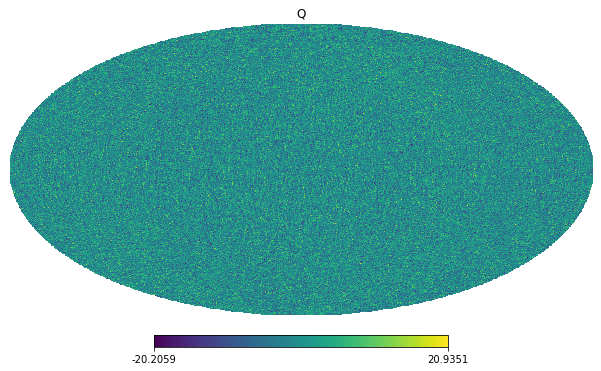

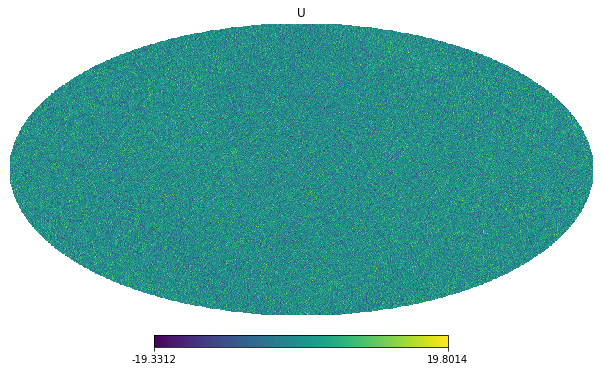

In [61]:
hp.mollview(map[0],title='Intensity')
hp.mollview(map[1],title='Q')
hp.mollview(map[2],title='U')

Now we can compute the power spectra from the maps above and compare them with the original power spectra. We use the 'anafast' function from healpy. Anafast take the maps in input and compute the power spectra from those maps. If 3 maps (T,Q,U) are given, anafast generates one auto-power spectrum per map (TT,EE,BB), plus the corss-correlation between T and E, T and B, E and B.

In [62]:
clout=hp.anafast(map)

(6, 1536)

Let's define an array of multipoles that we will use for plotting and for computing the normalization factor l(l+1)/2pi

In [66]:
lout=np.arange(2,len(clout[0,:]))
normout=lout*(lout+1)/2./np.pi

Now, let's plot the new power spectrum together with the original power spectrum. Do you see any differences? Are the spectra identical?

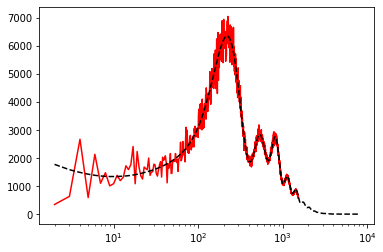

In [67]:
plt.plot(lout,clout[0,2:]*normout,'-r')
plt.plot(l,TT,'--k')
plt.xscale('log')

# Second task

Plot the other spectra (EE,BB,TE) together with the the original spectra

In [63]:
# Your code here
# ...

# Third task

Redo the procedure above. Generate new maps (we call them map1 for convenience) from the original power spectra and compare these new maps with the previous ones (map). For example, compute the difference between map1 and map, component by component. Is this difference vanishing? Why?

In [64]:
# Your code here
# ...

Compute power spectra from map1 and compare them with the power spectra obtained from map and with the original power spectra. Are all these sets of spectra identical to each other? Why?

In [ ]:
# Your code here
# ...

What you have just seen is cosmic variance at play. Each of the set of maps generated from the original power spectra are different realizations of the Universe. This is why if you take the difference of pairs of maps, this difference does not vanish. 

The original power spectra correspond to the 'true' variance (C_l). The power spectra computed from each set of maps are estimated Ch_l of C_l. For this reason, each individual Ch_l is not identical to the original C_l.  

However, if we could take the ensamble average of Ch_l, we would recover C_l. Let's check this point.

# Fourth task

From the same original power spectra, generate 10 sets of T,Q,U maps. From each set, compute the corresponding power spectra. Plot all TT spectra together with the original TT. Can you see by eye where the original spectra sit in the plot with respect to the 10 different realizations? 

Compute the average of the 10 TT spectra and compare it with the original TT power spectrum. How does the average compare with the original TT?

In [ ]:
# Your code here
# ...

Running sim number: 1
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 2
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 3
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 4
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 5
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 6
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 7
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 8
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 9
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 10
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


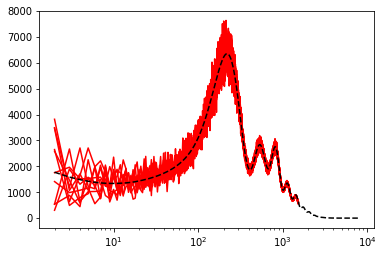

In [68]:
clav=0
for i in np.arange(10):
  print('Running sim number:',i+1)
  map=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm)
  clout=hp.anafast(map)
  clav+=clout
  plt.plot(lout,clout[0,2:]*normout,'-r')

plt.plot(l,TT,'--k')
plt.xscale('log')

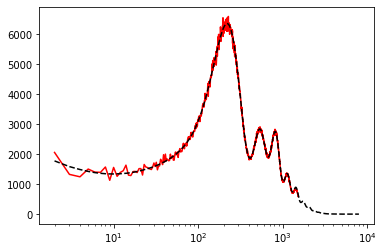

In [70]:
plt.plot(lout,clav[0,2:]*normout/10.,'-r')
plt.plot(l,TT,'--k')
plt.xscale('log')

You can try and see that, if you increase the number of realizations to average over, the difference between the original TT and the averaged TT decreases.

# Fifth task

Redo the task above with a different power spectrum, e.g. with TE.